In [3]:
import pandas as pd
import numpy as np

all_data = pd.read_csv('forest_dataset.csv')
all_data.head()

labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

from sklearn.model_selection import train_test_split

train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    feature_matrix, labels, test_size=0.2, random_state=42)

# Homework

The quality of classification/regression by the k Nearest Neighbors method depends on several parameters:
* the number of neighbors `n_neighbors`
* the distance metric between objects `metric`
* the weights of neighbors (the neighbors of the test example can enter with different weights, for example, the further the example, the less its "voice" is taken into account) `weights`


Train the `KNeighborsClassifier` on the dataset.

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf = KNeighborsClassifier(n_neighbors=5, metric='l1', weights='distance')

clf.fit(train_feature_matrix, train_labels)
preds = clf.predict(test_feature_matrix)
print(accuracy_score(test_labels, preds))

0.7835


Let's select the parameters of our model:

* Iterate over the grid from `1` to `10` for the number of neighbors parameter
* Also, try using different metrics: `['manhattan', 'euclidean']`
* Try using different weight calculation strategies: `[‘uniform’, ‘distance’]`

In [25]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_neighbors': np.arange(1, 11),
    'metric': ['manhattan', 'euclidean'],
    'weights': ['uniform', 'distance'],
}

clf_grid = GridSearchCV(clf, params, cv=5, scoring='accuracy', n_jobs=-1)
clf_grid.fit(train_feature_matrix, train_labels)
preds = clf.predict(test_feature_matrix)
print(accuracy_score(test_labels, preds))

0.7835


Let's output the best parameters

In [26]:
clf_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': np.int64(4), 'weights': 'distance'}

Using the optimal number of neighbors found, calculate the probabilities of belonging to classes for the test sample (`.predict_proba`).

In [68]:
optimal_clf = KNeighborsClassifier(**clf_grid.best_params_)
optimal_clf.fit(train_feature_matrix, train_labels)

pred_prob = optimal_clf.predict_proba(test_feature_matrix)
preds = optimal_clf.predict(test_feature_matrix)

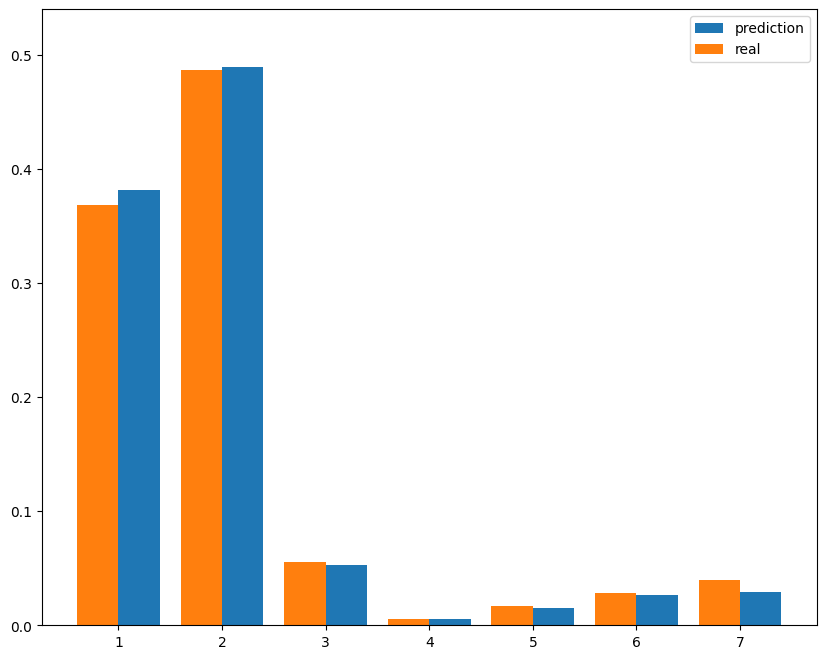

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

unique, freq = np.unique(test_labels, return_counts=True)
freq = list(map(lambda x: x / len(test_labels),freq))

pred_freq = pred_prob.mean(axis=0)
plt.figure(figsize=(10, 8))
plt.bar(range(1, 8), pred_freq, width=0.4, align="edge", label='prediction')
plt.bar(range(1, 8), freq, width=-0.4, align="edge", label='real')
plt.ylim(0, 0.54)
plt.legend()
plt.show()

## Conclusion

What is the quality of the model on the test sample? Compare it with the quality of logistic regression. Which model is better? Why? What are the pros and cons of the k Nearest Neighbors method? Plot the ROC curve for the k Nearest Neighbors method. Calculate the area under the ROC curve (AUC-ROC).

 - Качество логистической регрессии: 0.6418
 - Качество kNN: 0.7835

В данной задаче kNN сработал лучше, логистическая регрессия строит разделяющие гиперплоскости, и в случае если данные не линейно разделимы, логистическая регрессия не может качетсвенно сработать, напротив kNN использует метрический подход и позволяет строить сколь угодно сложные разделяющие поверхности, но он требует чтобы пространство признаков было довольно плотно заполнено точками что возможно лишь при небольшом числе признаков и довольно большом числе примеров, однако чем больше примеров тем медленнее работает kNN и больше памяти требует, поэтому его использование также ограничено. В данном слуяае, когда количество признаков и данных невелико, при этом данные линейно не разделимы kNN показывает себя лучше логичстической регрессии.

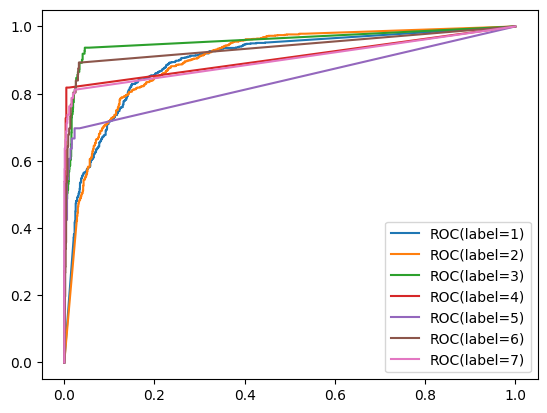

In [91]:
from sklearn.metrics import roc_curve, roc_auc_score

roc_scores = []

for i in range(7):
  roc = roc_curve(test_labels, pred_prob[:, i], pos_label=i+1)
  roc_scores.append(roc_auc_score(test_labels==i+1, pred_prob[:, i]))
  plt.plot(roc[0], roc[1], label=f'ROC(label={i+1})')

plt.legend()
plt.show()

In [101]:
unique_labels, label_counts = np.unique(test_labels, return_counts=True)
weights = label_counts[np.argsort(unique_labels)] / label_counts.sum()

In [103]:
roc_scores = np.array(roc_scores)

macro = roc_scores.mean()
weighted = (roc_scores * weights).sum()

print('Macro averaged AUC-ROC:', macro)
print('Weghted averaged AUC-ROC', weighted)

Macro averaged AUC-ROC: 0.9063452430548241
Weghted averaged AUC-ROC 0.9040564360102934
